# IA: adivinar y luego minimzar el error repetidamente

En este ejemplo intentaremos adivinar cuantos likes tiene un video de tiktok a partir de la cantidad de vistas

In [591]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [592]:
# tiktok vistas y likes de distintos videos
views = [234_000, 8_000, 217_000, 25_000, 62_000, 107_000, 
         140_000, 191_000, 189_000, 496_000, 221_000, 238_000]
likes = [ 39_000,   362,  31_000,  1_500,  4_000,   5_000,   
           6_000,  15_000,  11_000,  30_000,  30_000,  31_000]

In [593]:
df = pd.DataFrame({"Views":views,"Likes":likes})

In [594]:
df.head()

,Views,Likes
0,234000,39000
1,8000,362
2,217000,31000
3,25000,1500
4,62000,4000


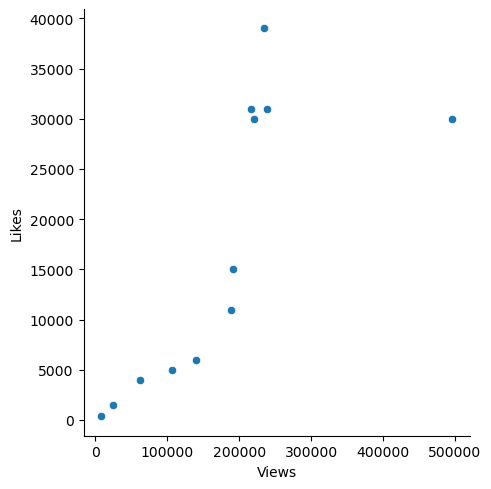

In [595]:
sns.relplot(x="Views",y="Likes", data=df);

### Generamos lineas al azar

Suponemos que la cantidad de likes es linealmente proporcional a la cantidad de vistas

In [596]:
#inicializo con valores aleatorios
b = 0.0
w = 0.1
#hago mi prediccion
def prediccion(x, w, b): 
    return w * x + b
#mi suma de los errores al cuadrado sera
def costo(x, w, b, y): 
    return np.sum((y - prediccion(x,w,b))**2)

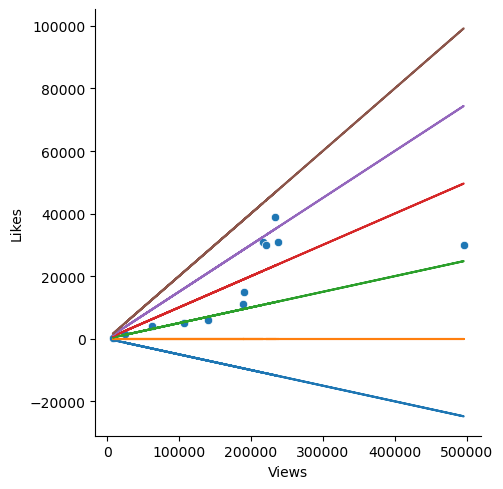

In [597]:
sns.relplot(x="Views",y="Likes", data=df)
pendientes = [-0.05,0.0,0.05,0.1,0.15,0.2]
costos = []
for w in pendientes:
    costos.append(costo(df["Views"], w, b, df["Likes"]))
    plt.plot(df["Views"], prediccion(df["Views"], w, b), '-');

### Calculamos los errores de cada linea que creamos

In [598]:
#tabla de la suma de errores para cada linea
df_costos = pd.DataFrame({"w":pendientes,"costo":costos})
df_costos

,w,costo
0,-0.05,1.220605e+10
1,0.00,5.668381e+09
2,0.05,1.936366e+09
3,0.10,1.010002e+09
4,0.15,2.889287e+09
5,0.20,7.574223e+09


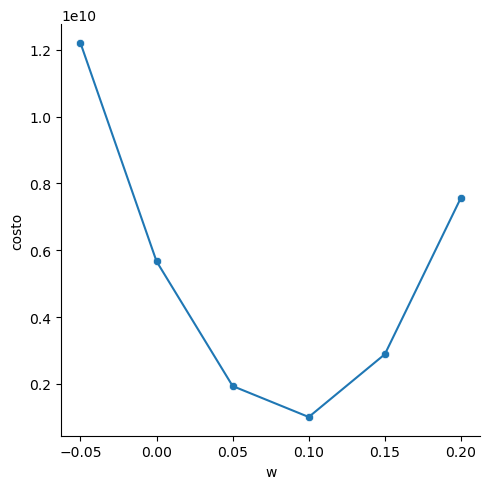

In [599]:
sns.relplot(x="w",y="costo", data=df_costos);
plt.plot(pendientes, costos, '-');

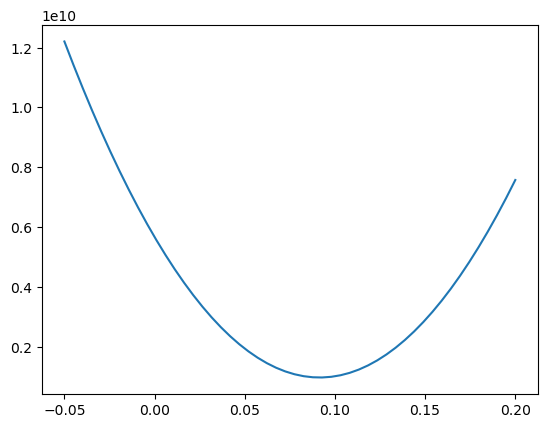

In [600]:
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(np.min(pendientes), np.max(pendientes), 50) 
spl = make_interp_spline(pendientes, costos, k=3)
plt.plot(xnew, spl(xnew));

## El truco matematico del gradiente descendiente

La pendiente (derivada) nos dira en que direccion tenemos que buscar para encontrar el minimo

In [601]:
import sympy as sy

In [602]:
x,y,w,b = sy.symbols('x y w b')
costFunf = (y-(w*x+b))**2
costFunf

(-b - w*x + y)**2

In [603]:
sy.diff(costFunf,w)

-2*x*(-b - w*x + y)

In [604]:
sy.diff(costFunf,b)

2*b + 2*w*x - 2*y

In [605]:
del x,y,w,b

In [606]:
def gradW(x,y,w,b):
    grad = -2*x*(-b-w*x+y)
    grad = np.sum(grad)
    return grad

In [607]:
def gradb(x,y,w,b):
    grad = 2*b+2*w*x-2*y
    grad = np.sum(grad)
    return grad

### El algortimo del gradiente descendiente

In [638]:
x = np.array(df["Views"])
y = np.array(df["Likes"])
w = 0.2
b = 0.0
ws, cs = [], []
for i in range(20):
    ws.append(w)
    cost = costo(x, w, b, y)
    cs.append(cost)
    grad = gradW(x, y, w, b)
    print(f"w:{w:0.3f} cost:{int(cost):10}")
    #w = w - 0.0000000000003 * grad
    #w = w - 0.0000000000018 * grad
    w = w - 0.00000000000001 * grad

w:0.200 cost:7574222644
w:0.199 cost:7426811174
w:0.198 cost:7282689819
w:0.196 cost:7141785145
w:0.195 cost:7004025358
w:0.194 cost:6869340267
w:0.193 cost:6737661246
w:0.192 cost:6608921202
w:0.191 cost:6483054541
w:0.190 cost:6359997129
w:0.188 cost:6239686266
w:0.187 cost:6122060653
w:0.186 cost:6007060355
w:0.185 cost:5894626778
w:0.184 cost:5784702634
w:0.183 cost:5677231915
w:0.182 cost:5572159863
w:0.181 cost:5469432940
w:0.180 cost:5368998805
w:0.179 cost:5270806286


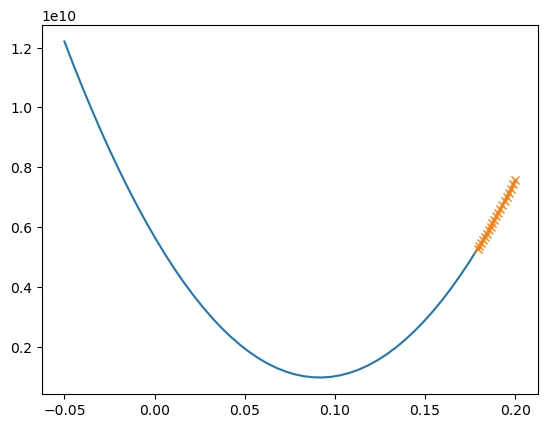

In [639]:
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(np.min(pendientes), np.max(pendientes), 50) 
spl = make_interp_spline(pendientes, costos, k=3)
plt.plot(xnew, spl(xnew));
plt.plot(ws, cs, 'x-');

## Dos dimensiones

In [484]:
x = np.array(df["Views"])
y = np.array(df["Likes"])
w = 0.2
b = 0.0
for epoch in range(60):
    cost = costo(x, w, b, y)
    tmp_gradW = gradW(x, y, w, b)
    tmp_gradb = gradb(x, y, w, b)
    if epoch%5 == 0: print(f"w:{w:0.4f} b:{int(b):4} cost:{int(cost):10}")
    w = w - 0.000000000001 * tmp_gradW
    b = b - 0.03 * tmp_gradb

w:0.2000 b:   0 cost:7574222644
w:0.0936 b:-3824 cost:1182882644
w:0.0932 b: 485 cost: 968780228
w:0.0863 b:1423 cost: 951531737
w:0.0844 b:1958 cost: 948898121
w:0.0834 b:2165 cost: 948432137
w:0.0830 b:2256 cost: 948347957
w:0.0828 b:2294 cost: 948332709
w:0.0828 b:2311 cost: 948329947
w:0.0827 b:2318 cost: 948329446
w:0.0827 b:2321 cost: 948329355
w:0.0827 b:2322 cost: 948329339


## Con PyTorch

In [572]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

In [583]:
x_data = Variable(torch.Tensor(x[..., None]))
x_data /= 100_000
y_data = Variable(torch.Tensor(y[..., None]))
y_data /= 10_000

In [584]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x) # X * W + b
        return y_pred
model = LinearRegression()

In [585]:
criterion = torch.nn.MSELoss()

In [586]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [587]:
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data)
    # Compute Loss
    loss = criterion(y_pred, y_data)
    if epoch%10 == 0: print(f"costo:{loss}")
    # Backward pass
    loss.backward()
    optimizer.step()

costo:12.028946876525879
costo:2.1198785305023193
costo:1.0889321565628052
costo:0.9661704897880554
costo:0.937984049320221
costo:0.9211357235908508
costo:0.9069487452507019
costo:0.8943759799003601
costo:0.8831658363342285
costo:0.8731635212898254


In [588]:
new_x = Variable(torch.Tensor([[300_000/100_000]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred)

predicted Y value:  tensor([[2.6132]], grad_fn=<AddmmBackward0>)


In [589]:
y_pred.data[0][0] * 10_000

tensor(26132.4629)

In [590]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.6359]], requires_grad=True)
Parameter containing:
tensor([0.7056], requires_grad=True)
